<a href="https://colab.research.google.com/github/mvajhi/Introduction-to-Data-Science/blob/main/ca7/main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Updates

In [ ]:
!pip install -U transformers
!pip install -U accelerate

After updating packages, restart the session and then start your notebook from imports.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from IPython.display import display
import string
from wordcloud import WordCloud
import nltk
import re
import string
from bs4 import BeautifulSoup
import sklearn.metrics as metrics

nltk.download(["stopwords", "punkt", "wordnet", "averaged_perceptron_tagger"])

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
aug_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/aug_imdb_unlabeled.jsonl', lines=True)
test_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/test_imdb.jsonl', lines=True)
train_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/train_imdb.jsonl', lines=True)
train_df

,text,label,embedding
0,fairly good romantic comedy in which i don't t...,1,"[-0.0167805497, -0.0395836979, 0.1233159453000..."
1,"""dressed to kill"", is one of the best thriller...",1,"[-0.12526972590000002, 0.10147688540000001, 0...."
2,i'm glad that users (as of this date) who like...,1,"[0.1312361956, 0.0294876788, 0.2328549027, -0...."
3,needed an excuse to get out of the house while...,0,"[0.1387384981, 0.0460377187, 0.3447172046, -0...."
4,john candy's performance in once upon a crime ...,1,"[0.1606466323, -0.1768193543, 0.35633808370000..."
...,...,...,...
145,"this film, i thought, was the great journey th...",1,"[-0.0127362479, -0.1083025485, 0.1512588710000..."
146,i have wanted to see this for the longest time...,1,"[-0.0872147828, -0.1653934121, 0.238217473, -0..."
147,the egyptian movies has a lot of filmes with h...,0,"[0.0326799825, 0.0344635732, 0.344242215200000..."
148,"when anti-bush jokes get really easy to do, a ...",0,"[-0.039546337, -0.04593236, 0.119179666, 0.087..."


# Preprocessing

In [ ]:
def nltk_pos_tagger(nltk_tag):
    if nltk_tag.startswith('J'):
        return 'a'
    elif nltk_tag.startswith('V'):
        return 'v'
    elif nltk_tag.startswith('N'):
        return 'n'
    elif nltk_tag.startswith('R'):
        return 'r'
    else:
        return 'n'

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

def preprocess_data(text: str):
    """
    Preprocessing steps are as follows:
    1. lowercase the text
    2. remove punctuation
    3. remove numbers
    4. remove urls
    5. remove usernames
    6. remove extra spaces
    7. convert emojis to text
    8. remove non-word characters
    9. lemmatization and tokenization of the text
    10. remove stopwords
    :param text: str
    :return: tokens: list[str]
    """
    text = remove_html_tags(text)

    text = text.lower()

    text = text.translate(str.maketrans('', '', string.punctuation))

    text = text.translate(str.maketrans('', '', string.digits))

    text = re.sub(r'@\S+', '', text)

    text = re.sub(' +', ' ', text)

    text = re.sub(r'[^a-z ]+', '', text)

    tokens = [word for word in nltk.word_tokenize(text)]

    stop_words = set(nltk.corpus.stopwords.words('english')).union(set(['film', 'movie'])).union(set(['against','not','don', "dont",'ain', 'aren', "arent", 'couldn', "couldnt", 'didn', "didnt",
             'doesn', "doesnt", 'hadn', "hadnt", 'hasn', "hasnt", 'haven', "havent", 'isn', "isnt",
             'mightn', "mightnt", 'mustn', "mustnt", 'needn', "neednt",'shouldn', "shouldnt", 'wasn',
             "wasnt", 'weren', "werent", 'won', "wont", 'wouldn', "wouldnt"]))
    tokens = [word for word in tokens if word not in stop_words]

    return ' '.join(tokens)

In [ ]:
train_df['norm_text'] = train_df['text'].apply(preprocess_data)
train_df
test_df['norm_text'] = test_df['text'].apply(preprocess_data)
aug_df['norm_text'] = aug_df['text'].apply(preprocess_data)

<ipython-input-4-e2ac3cf070ee>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()
<ipython-input-4-e2ac3cf070ee>:14: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  return BeautifulSoup(text, "html.parser").get_text()


# EDA

<Axes: title={'center': 'label'}, ylabel='Frequency'>

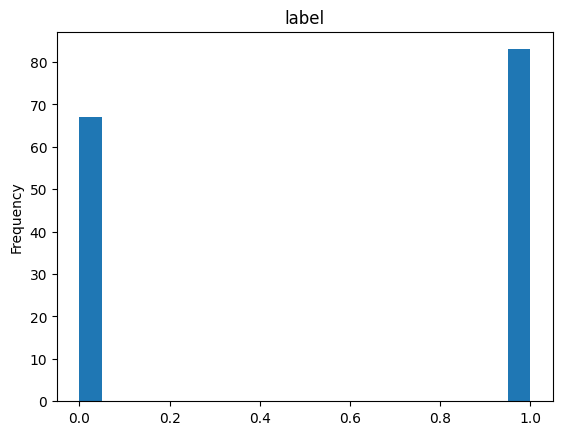

In [ ]:
train_df['label'].plot(kind='hist', bins=20, title='label')

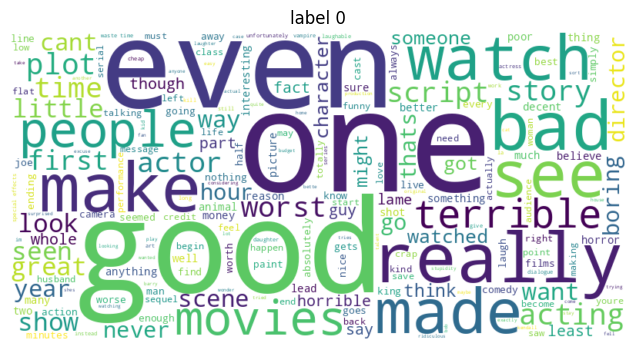

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(train_df[train_df['label'] == 0]['norm_text']))

plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("label 0")
plt.show()

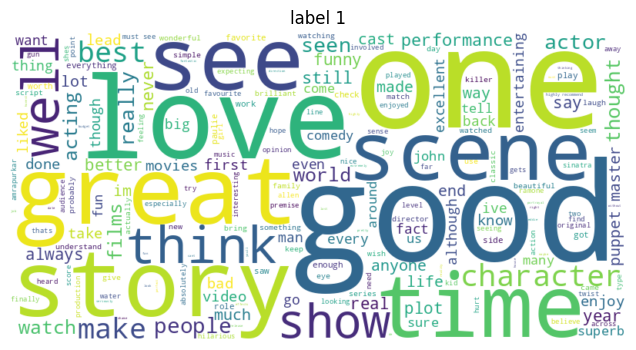

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(train_df[train_df['label'] == 1]['norm_text']))

plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("label 1")
plt.show()

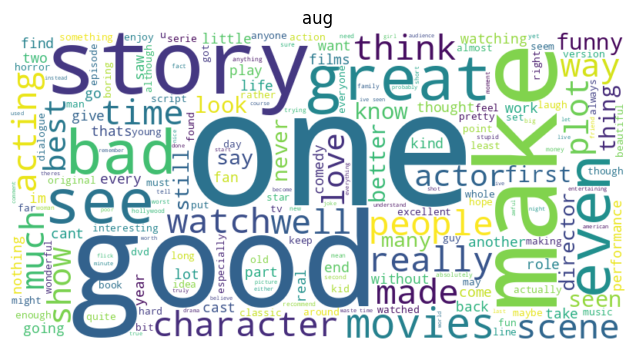

In [ ]:
wordcloud = WordCloud(width = 800, height = 400, background_color ='white').generate(' '.join(aug_df['norm_text']))

plt.figure(figsize = (8, 4))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("aug")
plt.show()

Text(0, 0.5, 'Frequency')

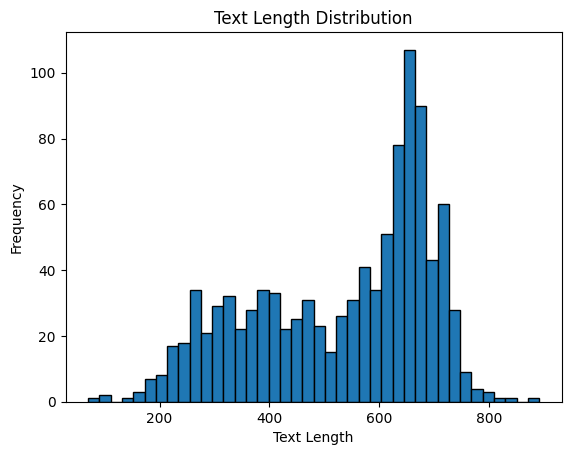

In [ ]:
aug_df['text'].apply(len).plot(bins=40, kind='hist', edgecolor='black')
plt.title('Text Length Distribution')
plt.xlabel('Text Length')
plt.ylabel('Frequency')

<Axes: xlabel='text'>

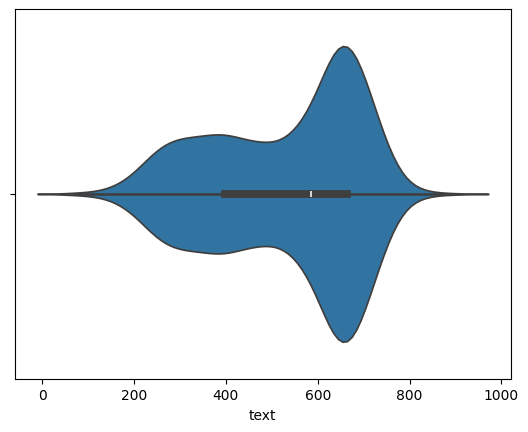

In [ ]:
sns.violinplot(x=aug_df['text'].apply(len))

<Axes: xlabel='text'>

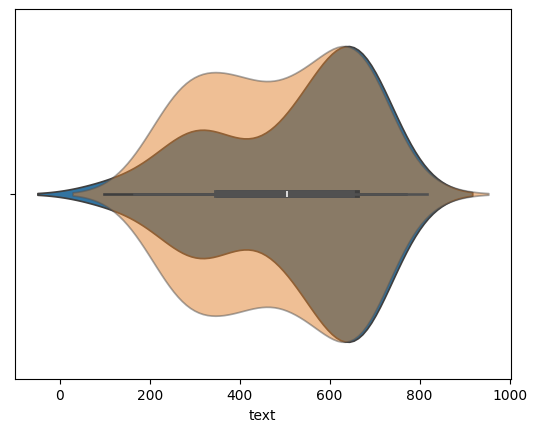

In [12]:
sns.violinplot(x=train_df[train_df['label'] == 0]['text'].apply(len))
sns.violinplot(x=train_df[train_df['label'] == 1]['text'].apply(len), alpha = 0.5)

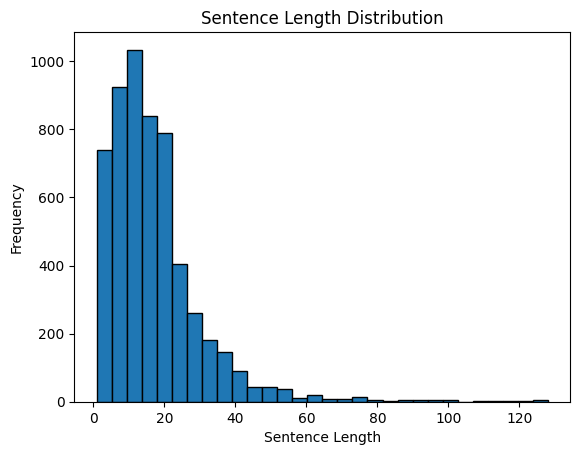

In [ ]:
import nltk
import matplotlib.pyplot as plt

def get_sent_len(c):
  sent = c.apply(nltk.sent_tokenize)

  sent_len = sent.apply(lambda sentences: [len(sentence.split()) for sentence in sentences])

  return [length for lengths in sent_len for length in lengths]

plt.hist(get_sent_len(aug_df['text']), bins=30, edgecolor='black')
plt.title('Sentence Length Distribution')
plt.xlabel('Sentence Length')
plt.ylabel('Frequency')
plt.show()

In [ ]:
pd.DataFrame(np.array([i for i in train_df['embedding']]))

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.016781,-0.039584,0.123316,-0.112681,0.147103,0.022566,0.053462,0.613809,-0.010480,-0.017736,...,-0.044090,-0.195328,0.035722,-0.379844,-0.180571,-0.036396,0.114420,-0.036291,0.421711,0.060781
1,-0.125270,0.101477,0.171829,-0.150420,0.494087,-0.016729,-0.013425,0.205318,0.108327,-0.051374,...,-0.124974,-0.187593,0.028957,-0.121169,-0.393291,0.200559,0.443822,-0.081122,0.346749,0.065129
2,0.131236,0.029488,0.232855,-0.002422,0.081981,-0.063562,0.132140,0.502777,0.177675,0.016718,...,-0.149487,-0.165477,0.012854,-0.191873,-0.312853,0.013078,0.150811,-0.169557,0.233549,0.052898
3,0.138738,0.046038,0.344717,-0.042892,0.225556,-0.144981,0.023403,0.574083,0.136434,-0.093866,...,-0.172745,-0.077552,-0.013346,-0.228877,-0.144858,-0.075651,-0.076263,0.022555,0.092200,-0.068175
4,0.160647,-0.176819,0.356338,-0.119723,0.257010,-0.037752,0.053498,0.674560,0.024863,0.011699,...,0.191215,-0.103852,0.013501,-0.221421,-0.197348,0.124097,0.090596,0.123112,0.122473,0.097609
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,-0.012736,-0.108303,0.151259,0.018022,0.281201,-0.304326,-0.005685,0.487199,0.094383,-0.053792,...,0.062376,-0.103134,0.062240,-0.161306,-0.152781,0.220059,0.102940,-0.042109,0.171636,0.166082
146,-0.087215,-0.165393,0.238217,-0.081272,0.315752,-0.097431,-0.027156,0.777568,0.132130,-0.288178,...,-0.012167,-0.146171,0.079091,-0.376557,-0.266569,0.103020,0.086039,-0.091507,0.265124,-0.024546
147,0.032680,0.034464,0.344242,-0.275831,0.163914,-0.428903,0.221885,0.732542,0.055032,-0.160223,...,0.217750,-0.002559,0.116916,-0.336276,-0.309363,-0.234953,-0.053021,-0.354898,0.348796,-0.058987
148,-0.039546,-0.045932,0.119180,0.087794,0.086585,-0.269455,-0.032886,0.792388,-0.048601,-0.116552,...,-0.490129,-0.009202,0.032049,-0.106289,0.044190,0.030491,0.212227,-0.070574,0.261716,0.209701


In [ ]:
train_df.drop('norm_text', axis=1, inplace=True)
test_df.drop('norm_text', axis=1, inplace=True)
aug_df.drop('norm_text', axis=1, inplace=True)

# Imports

In [ ]:
import torch
from transformers import AutoTokenizer, AutoModelForCausalLM

# Load model

In [ ]:
MODEL_ARGS = {
    'Name': 'microsoft/Phi-3-mini-128k-instruct',
    'DType': torch.bfloat16
}
device = "cuda" if torch.cuda.is_available() else "cpu"

In [ ]:
def load_model(model_args):
    model = AutoModelForCausalLM.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
        torch_dtype=model_args['DType'],
        low_cpu_mem_usage=True,
        device_map={"": device},
    )
    tokenizer = AutoTokenizer.from_pretrained(
        model_args['Name'],
        trust_remote_code=True,
    )

    return model, tokenizer


model, tokenizer = load_model(MODEL_ARGS)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model.safetensors.index.json:   0%|          | 0.00/16.3k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.67G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/172 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/3.17k [00:00<?, ?B/s]

tokenizer.model:   0%|          | 0.00/500k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.84M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/293 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/568 [00:00<?, ?B/s]

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [ ]:
def generate_text(model, tokenizer, prompt, max_new_tokens = 100, do_sample=True, temperature=0.5):

    input_ids = tokenizer.encode(prompt, return_tensors='pt').to(device)
    if do_sample:
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, do_sample=True, temperature=temperature)
    else:
        output_ids = model.generate(input_ids, max_new_tokens=max_new_tokens, do_sample=do_sample)

    output_text = tokenizer.decode(output_ids[0], skip_special_tokens=True)

    return output_text[len(prompt):]

In [ ]:
prompt = """Insturction: Tell me a funny story about a cute cat
Answer:"""

generate_text(
    model=model,
    tokenizer=tokenizer,
    prompt=prompt,
    max_new_tokens=200,
    temperature=1.2,
)

" Once upon a time, there was a cute cat named Mittens who loved to explore her surroundings. One day, Mittens decided she wanted to go on an adventure to climb the tallest tree in the neighborhood. She sneaked out of her house and managed to make it to the massive oak tree. But as soon as she began her ascent, a strong gust of wind blew her right off the branch and into the arms of a local news reporter who was amazed by her agility and charm.\n\nFrom that day forward, Mittens became famous for her tree-climbing antics. She even starred in a few cat commercials for her newfound fame. And whenever she climbed a tree, the town couldn't help but laugh at Mittens' determination, even though she would sometimes come back in a bit of a tangle or two. In the end, everyone loved and admired the"

In [ ]:
train_df

,text,label,embedding,norm_text
0,fairly good romantic comedy in which i don't t...,1,"[-0.0167805497, -0.0395836979, 0.1233159453000...",fairly good romantic comedy think ive ever see...
1,"""dressed to kill"", is one of the best thriller...",1,"[-0.12526972590000002, 0.10147688540000001, 0....",dressed kill one best thrillers ever made deal...
2,i'm glad that users (as of this date) who like...,1,"[0.1312361956, 0.0294876788, 0.2328549027, -0....",im glad users date liked coming forward unders...
3,needed an excuse to get out of the house while...,0,"[0.1387384981, 0.0460377187, 0.3447172046, -0....",needed excuse get house paint dried left hour ...
4,john candy's performance in once upon a crime ...,1,"[0.1606466323, -0.1768193543, 0.35633808370000...",john candys performance upon crime possibly be...
...,...,...,...,...
145,"this film, i thought, was the great journey th...",1,"[-0.0127362479, -0.1083025485, 0.1512588710000...",thought great journey forrest gump rare treat ...
146,i have wanted to see this for the longest time...,1,"[-0.0872147828, -0.1653934121, 0.238217473, -0...",wanted see longest time james merendino great ...
147,the egyptian movies has a lot of filmes with h...,0,"[0.0326799825, 0.0344635732, 0.344242215200000...",egyptian movies lot filmes high level drama ro...
148,"when anti-bush jokes get really easy to do, a ...",0,"[-0.039546337, -0.04593236, 0.119179666, 0.087...",antibush jokes get really easy show like bette...


In [ ]:
train_df.iloc[145:]

,text,label,embedding,norm_text
145,"this film, i thought, was the great journey th...",1,"[-0.0127362479, -0.1083025485, 0.1512588710000...",thought great journey forrest gump rare treat ...
146,i have wanted to see this for the longest time...,1,"[-0.0872147828, -0.1653934121, 0.238217473, -0...",wanted see longest time james merendino great ...
147,the egyptian movies has a lot of filmes with h...,0,"[0.0326799825, 0.0344635732, 0.344242215200000...",egyptian movies lot filmes high level drama ro...
148,"when anti-bush jokes get really easy to do, a ...",0,"[-0.039546337, -0.04593236, 0.119179666, 0.087...",antibush jokes get really easy show like bette...
149,"""telefilms"" tend to fall under the pitfalls of...",1,"[-0.0471526384, 0.1628640443, 0.3060246408, -0...",telefilms tend fall pitfalls low budget hasty ...


In [ ]:
def find_label(shots, q):
  prompt = "Insturction: The following texts are the comments of the imdb site, which are categorized in such a way that you label positive comments with 1 and negative comments with 0. (Just write 0 or 1 in the answer and don't explain)"
  for index, row in shots.iterrows():
    prompt += f"\nQuestion: {row['text']}"
    prompt += f"\nAnswer:{row['label']}"

  prompt += f"\nQuestion: {q['text']}"
  prompt += "\nAnswer:"

  return generate_text(
      model=model,
      tokenizer=tokenizer,
      prompt=prompt,
      max_new_tokens=1,
      temperature=0.2,
  )
find_label(train_df.iloc[:5], train_df.iloc[148])

'0'

In [ ]:
# shots = train_df.iloc[:5]
# for i in range(len(aug_df)):
#   result = int(find_label(shots, aug_df.iloc[i]))
#   aug_df.at[i,'label'] = result
#   if i % 10 == 0:
#     print(i)
#   if i % 100 == 0:
#     aug_df.to_json('/content/drive/MyDrive/Colab Notebooks/aug_with_label.jsonl')
#     print('update!')

0
update!
10
20
30
40
50
60
70
80
90
100
update!
110
120
130
140
150
160
170
180
190
200
update!
210
220
230
240
250
260
270
280
290
300
update!
310
320
330
340
350
360
370
380
390
400
update!
410
420
430
440
450
460
470
480
490
500
update!
510
520
530
540
550
560
570
580
590
600
update!
610
620
630
640
650
660
670
680
690
700
update!
710
720
730
740
750
760
770
780
790
800
update!
810
820
830
840
850
860
870
880
890
900
update!
910
920
930
940
950
960
970
980
990
1000
update!
1010


In [16]:
aug_df = pd.read_json('/content/drive/MyDrive/Colab Notebooks/aug_with_label.jsonl')
aug_df

,text,embedding,label
0,there is no relation at all between fortier an...,"[-0.09757755700000001, -0.1536363065, 0.311417...",1
1,in the process of trying to establish the audi...,"[-0.00033669360000000004, 0.08777780830000001,...",0
2,i give this movie 7 out of 10 because the vill...,"[-0.275570631, -0.32913637160000003, 0.0793179...",1
3,this is the best sci-fi that i have seen in my...,"[0.1461943835, -0.2785910368, 0.4456491172, -0...",1
4,what an appalling piece of rubbish!!! who are ...,"[0.1696606129, 0.354041934, 0.4451519549000000...",0
...,...,...,...
1009,unbelievable!<br /><br />this film gets a 7 ou...,"[-0.0955021083, 0.0211753864, 0.35705754160000...",0
1010,sweet romantic drama/comedy about stewart and ...,"[0.017505046, -0.050160985400000004, 0.4082049...",1
1011,"personally, i disdain the jerry springer show,...","[-0.19647170600000002, -0.0579777397, 0.179255...",1
1012,this film looked promising but it was actually...,"[-0.0007334474000000001, -0.1367768645, 0.1660...",0


In [17]:
display(aug_df[(aug_df['label'] != 0) & (aug_df['label'] != 1)])
# 141 -> 1
# 497 -> 1
# 765 -> 1
for i in [141,497,765]:
  aug_df.at[i,'label'] = 1

,text,embedding,label
141,(spoilers?)<br /><br />while the historical ac...,"[-0.0439774394, 0.0723523423, 0.41475325820000...",5
497,that's a problem i have with movies that come ...,"[0.018063573200000002, 0.07929244640000001, 0....",2
765,i'm a huge fan of the twin sisters. although t...,"[0.09623264520000001, -0.2304039448, 0.3167082...",4


In [ ]:
a = aug_df["embedding"].to_list()
a = np.array(a)
a.shape

(1014, 768)

In [ ]:
pd.DataFrame(np.array(aug_df["embedding"].to_list()))

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,-0.097578,-0.153636,0.311417,0.030520,0.211818,-0.151885,0.006378,0.366098,0.190314,-0.276206,...,-0.292268,-0.182791,-0.053788,-0.231376,-0.308851,-0.024332,0.048270,-0.082222,0.578135,-0.032731
1,-0.000337,0.087778,-0.007164,0.118093,0.312951,-0.079622,0.150585,0.550878,-0.012125,-0.256813,...,-0.344475,0.226954,-0.120762,-0.199064,-0.079021,-0.209518,0.162193,-0.115619,-0.097856,0.017722
2,-0.275571,-0.329136,0.079318,0.071611,0.177593,-0.131866,-0.020589,0.410951,0.013807,-0.147255,...,-0.205598,-0.008902,0.123043,-0.154760,-0.110534,-0.012030,0.209303,0.026651,0.440879,-0.037475
3,0.146194,-0.278591,0.445649,-0.009135,0.208270,-0.144610,0.070797,0.491009,0.165386,-0.109396,...,-0.132134,-0.093624,0.050069,-0.243474,-0.148038,0.213451,0.133828,-0.065608,0.486251,-0.103015
4,0.169661,0.354042,0.445152,-0.075730,0.028488,-0.000389,0.021385,0.620499,0.260837,-0.214956,...,-0.145578,-0.171072,-0.179506,-0.270028,-0.206235,-0.012388,0.047808,-0.122534,0.306808,0.199574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1009,-0.095502,0.021175,0.357058,-0.132645,0.191091,-0.118738,0.082526,0.842726,0.179910,-0.150741,...,-0.112733,-0.069684,0.018771,-0.347073,-0.250546,0.129283,0.204098,-0.208941,0.457088,0.008937
1010,0.017505,-0.050161,0.408205,-0.076074,0.485385,-0.150266,0.158359,0.487189,0.199016,-0.090949,...,-0.047017,-0.359928,-0.083250,-0.254106,-0.380683,0.103381,0.076058,-0.203719,0.190500,-0.017864
1011,-0.196472,-0.057978,0.179255,-0.106598,0.059643,-0.176397,0.009714,0.404060,0.159574,0.072565,...,-0.169224,0.028779,-0.088875,-0.108830,-0.082903,-0.035345,0.396249,0.212461,0.426900,0.063165
1012,-0.000733,-0.136777,0.166093,0.122063,0.161736,0.061725,0.149064,0.488211,0.461464,-0.056753,...,-0.117565,-0.161892,-0.024791,-0.152552,-0.199232,-0.038998,0.109979,-0.068365,0.453943,-0.019272


# Label Propagation

In [ ]:
import numpy as np
from sklearn.semi_supervised import LabelPropagation

labeled_embeddings = np.array(train_df['embedding'].tolist())
labeled_labels = train_df['label'].to_numpy()

unlabeled_embeddings = np.array(aug_df['embedding'].tolist())
unlabeled_labels = np.full(len(unlabeled_embeddings), -1)

combined_embeddings = np.vstack((labeled_embeddings, unlabeled_embeddings))
combined_labels = np.concatenate((labeled_labels, unlabeled_labels))

label_prop_model = LabelPropagation()

label_prop_model.fit(combined_embeddings, combined_labels)

predicted_labels = label_prop_model.predict(unlabeled_embeddings)

aug_df['predicted_label'] = predicted_labels

In [ ]:
X_train = pd.concat([pd.DataFrame(np.array(aug_df["embedding"].to_list())), pd.DataFrame(np.array(train_df["embedding"].to_list()))])

y_train = {
    'LLM': pd.concat([aug_df["label"],train_df["label"]]),
    'propag': pd.concat([aug_df["predicted_label"],train_df["label"]])
}

X_test = pd.DataFrame(np.array(test_df["embedding"].to_list()))
y_test = test_df['label']

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from copy import deepcopy
class Evaluator:
    def __init__(self, models:dict, test_data, test_label, train_data, train_label):
        self.models = models
        self.test_data = test_data
        self.test_label = test_label
        self.train_label = train_label
        self.train_data = train_data

    def calculate_evaluators(self):
        predict = {i: self.models[i].predict(self.test_data) for i in self.models.keys()}
        result = dict()
        for i in self.models.keys():
            result[i] = dict()
            result[i]['accuracy']    = accuracy_score(self.test_label, predict[i])
            result[i][f'f1']         = f1_score(self.test_label, predict[i])
            result[i][f'recall']     = recall_score(self.test_label, predict[i])
            result[i][f'precision']  = precision_score(self.test_label, predict[i])

        return pd.DataFrame(result).transpose()

    def show_confusion_matrix(self, return_val=False):
        predict = {i: self.models[i].predict(self.test_data) for i in self.models.keys()}
        out = dict()

        for i in self.models.keys():
            result = confusion_matrix(self.test_label, predict[i])

            plt.figure(figsize=(5, 3))
            sns.heatmap(result, annot=True, cmap="coolwarm", fmt='d',
                        yticklabels=self.models[i].classes_,
                        xticklabels=self.models[i].classes_)
            plt.title(f'Confusion Matrix for Model {i}')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.show()

            out[i] = result

            if return_val:
                return out

    def add_or_change_module(self, model:dict):
        for i in model.keys():
            self.models[i] = model[i]

    def fit_models(self, models:dict):
      for name, model in models.items():
        for method, label in self.train_label.items():
          self.add_or_change_module({f'{name} {method}':deepcopy(model).fit(self.train_data, label)})
evaluator = Evaluator({}, X_test, y_test, X_train, y_train)

In [ ]:
from sklearn.svm import SVC
evaluator_SVM = Evaluator({}, X_test, y_test, X_train, y_train)
for kernel in {'linear', 'poly', 'sigmoid', 'rbf'}:
  evaluator_SVM.fit_models({f'SVM {kernel}': SVC(kernel=kernel)})
evaluator_SVM.calculate_evaluators()

,accuracy,f1,recall,precision
SVM linear LLM,0.826667,0.826667,0.861111,0.794872
SVM linear propag,0.700000,0.680851,0.666667,0.695652
SVM sigmoid LLM,0.846667,0.827068,0.763889,0.901639
SVM sigmoid propag,0.773333,0.750000,0.708333,0.796875
SVM rbf LLM,0.886667,0.875912,0.833333,0.923077
SVM rbf propag,0.760000,0.739130,0.708333,0.772727
SVM poly LLM,0.866667,0.859155,0.847222,0.871429
SVM poly propag,0.746667,0.724638,0.694444,0.757576


In [ ]:
evaluator.add_or_change_module({'SVM sigmoid propag': evaluator_SVM.models['SVM sigmoid propag'],
                                'SVM rbf LLM': evaluator_SVM.models['SVM rbf LLM']})
evaluator.calculate_evaluators()

,accuracy,f1,recall,precision
SVM sigmoid propag,0.773333,0.750000,0.708333,0.796875
SVM rbf LLM,0.886667,0.875912,0.833333,0.923077


In [ ]:
from sklearn.tree import DecisionTreeClassifier
evaluator_DT = Evaluator({}, X_test, y_test, X_train, y_train)
for criterion in {'gini', 'entropy', 'log_loss'}:
  evaluator_DT.fit_models({f'DT {criterion}': DecisionTreeClassifier(criterion=criterion, min_samples_split=100)})
evaluator_DT.calculate_evaluators()

,accuracy,f1,recall,precision
DT entropy LLM,0.686667,0.675862,0.680556,0.671233
DT entropy propag,0.680000,0.641791,0.597222,0.693548
DT gini LLM,0.660000,0.648276,0.652778,0.643836
DT gini propag,0.660000,0.657718,0.680556,0.636364
DT log_loss LLM,0.686667,0.675862,0.680556,0.671233
DT log_loss propag,0.680000,0.641791,0.597222,0.693548


In [ ]:
evaluator.add_or_change_module({'DT entropy LLM': evaluator_DT.models['DT entropy LLM'],
                                'DT entropy propag': evaluator_DT.models['DT entropy propag']})
evaluator.calculate_evaluators()

,accuracy,f1,recall,precision
SVM sigmoid propag,0.773333,0.750000,0.708333,0.796875
SVM rbf LLM,0.886667,0.875912,0.833333,0.923077
DT entropy LLM,0.686667,0.675862,0.680556,0.671233
DT entropy propag,0.680000,0.641791,0.597222,0.693548


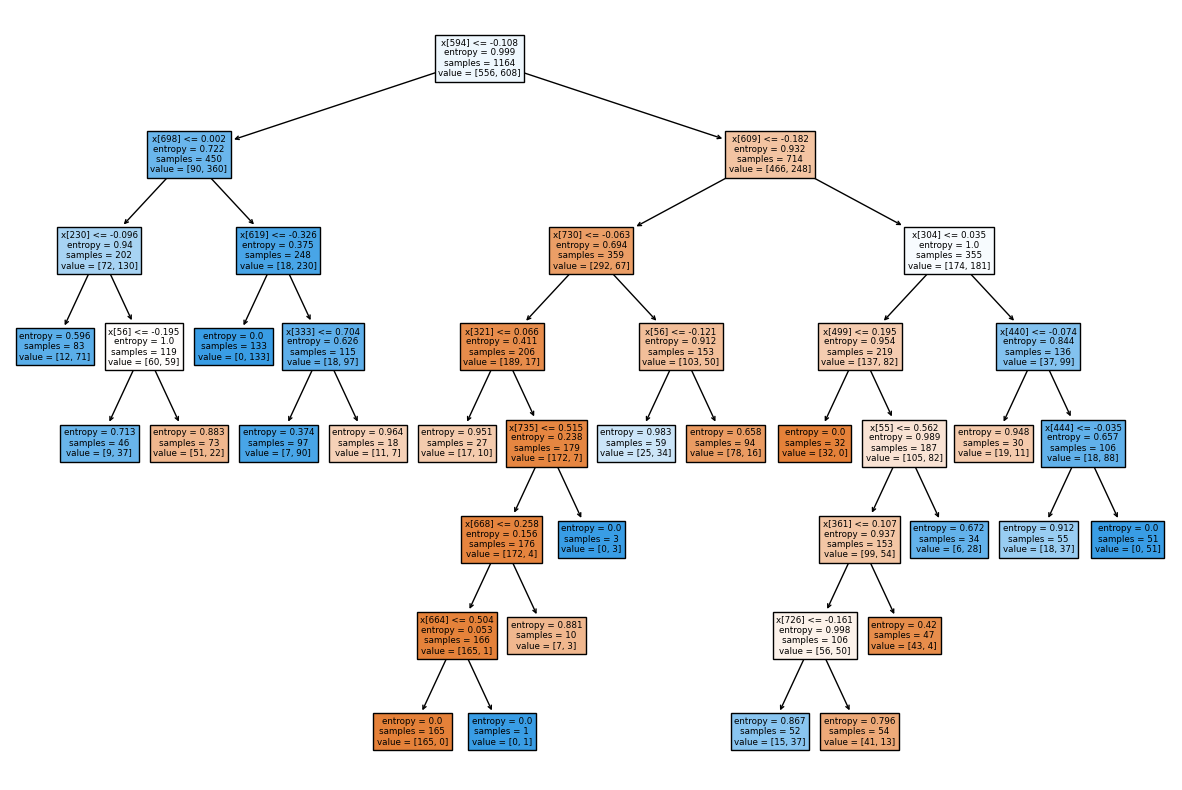

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
_ = plot_tree(evaluator_DT.models['DT entropy LLM'], filled=True)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
evaluator.fit_models({f'RF': RandomForestClassifier(n_estimators=493)})
evaluator.calculate_evaluators()

,accuracy,f1,recall,precision
SVM sigmoid propag,0.773333,0.750000,0.708333,0.796875
SVM rbf LLM,0.886667,0.875912,0.833333,0.923077
DT entropy LLM,0.686667,0.675862,0.680556,0.671233
DT entropy propag,0.680000,0.641791,0.597222,0.693548
RF LLM,0.813333,0.810811,0.833333,0.789474
RF propag,0.753333,0.737589,0.722222,0.753623


In [ ]:
from xgboost import XGBClassifier
evaluator.fit_models({f'XGBoost': XGBClassifier()})
evaluator.calculate_evaluators()

,accuracy,f1,recall,precision
SVM sigmoid propag,0.773333,0.750000,0.708333,0.796875
SVM rbf LLM,0.886667,0.875912,0.833333,0.923077
DT entropy LLM,0.686667,0.675862,0.680556,0.671233
DT entropy propag,0.680000,0.641791,0.597222,0.693548
RF LLM,0.813333,0.810811,0.833333,0.789474
RF propag,0.753333,0.737589,0.722222,0.753623
XGBoost LLM,0.813333,0.813333,0.847222,0.782051
XGBoost propag,0.746667,0.743243,0.763889,0.723684


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
evaluator.fit_models({f'KNN': KNeighborsClassifier(n_neighbors=5)})
evaluator.calculate_evaluators()

,accuracy,f1,recall,precision
SVM sigmoid propag,0.773333,0.750000,0.708333,0.796875
SVM rbf LLM,0.886667,0.875912,0.833333,0.923077
DT entropy LLM,0.686667,0.675862,0.680556,0.671233
DT entropy propag,0.680000,0.641791,0.597222,0.693548
RF LLM,0.813333,0.810811,0.833333,0.789474
RF propag,0.753333,0.737589,0.722222,0.753623
XGBoost LLM,0.813333,0.813333,0.847222,0.782051
XGBoost propag,0.746667,0.743243,0.763889,0.723684
KNN LLM,0.733333,0.736842,0.777778,0.700000
KNN propag,0.700000,0.680851,0.666667,0.695652


## Q1: Semi-Supervised Learning and Data Selection

Semi-supervised learning tackles machine learning problems where labeled data is scarce but a wealth of unlabeled data exists. It leverages both sets to train a model, making it a powerful tool for situations where labeling data is expensive or time-consuming.

**Choosing the Proportion of Manually Labeled Data:**
* **Complexity of the problem:**   
* **Quality of the unlabeled data:**  Noisy or irrelevant unlabeled data can hinder performance. If the unlabeled data is reliable, a smaller proportion of labeled data might suffice.

**Does the Choice of Data Matter?**
* **Representativeness:** The labeled data should be a microcosm of the entire dataset, encompassing the range of variations present in the unlabeled data. A biased selection can lead to a model that performs well on the labeled data but poorly on unseen data.
* **Informativeness:**  Ideally, choose data points that are informative for the learning algorithm. For classification tasks, this could involve selecting points on the borders between classes, where the model is most likely to struggle.

**strategies for selecting data for labeling:**

* **Random sampling:** This is a baseline approach, but it might not be ideal if the data has uneven distribution.
* **Active learning:** This technique involves iteratively querying a human annotator for labels on the data points the model is most uncertain about.
* **Uncertainty sampling:** This focuses on labeling points where the model has the lowest confidence in its prediction.
* **Diversity sampling:** This ensures the labeled data covers a wide range of the feature space in the unlabeled data.

## Q2: Quality vs. Quantity in Label Propagation

Label propagation relies on the information from labeled data points to propagate labels to unlabeled ones. Here's the interplay between quality and quantity:

* **Quality:** High-quality labeled data points are those that are unambiguous and accurately represent the different categories or communities present in the data. Inaccurate or noisy labels can mislead the propagation process and lead to incorrect assignments for unlabeled points.

* **Quantity:** More labeled data points provide a broader base for the algorithm to learn from. However, the benefit diminishes if the additional data is redundant or irrelevant.  

**Finding the Balance:**
* **Focus on informativeness:**  Prioritize labeling data points that lie on the boundaries between clusters or classes. These points are the most informative for guiding the propagation process.
* **Active learning:** Implement a strategy where human effort is focused on the most uncertain data points the algorithm encounters during iterations.
* **Cost vs. Benefit:** Consider the cost of labeling additional data points. If the improvement in performance plateaus with more labeled data, it might be more efficient to allocate resources elsewhere.

By carefully selecting a representative set of high-quality data points, you can achieve good results in label propagation even with a limited amount of labeled data.

## Q3:Limitations of Label Propagation and Potential for LLMs

Label propagation, despite its simplicity and efficiency, has some drawbacks:

* **Sensitivity to Graph Structure:**  Label propagation relies heavily on the structure of the underlying graph connecting data points. Issues arise with:
    * **Disassortative labels:** When data points with opposite labels tend to be connected (e.g., social media with opposing viewpoints).
    * **Uneven edge density:** If clusters have different levels of interconnectedness, propagation might favor denser areas.
    * **Non-uniform label distribution:** If a small number of labels dominate the data, the propagation might get "stuck" in these categories.
* **Limited Feature Consideration:** Label propagation primarily focuses on the relationships between data points based on the graph structure. It doesn't directly utilize the inherent features of the data points themselves.

**Can LLMs Help?**

Large Language Models (LLMs) have the potential to address some of these limitations:

* **Understanding Feature Semantics:**  LLMs are trained on massive amounts of text data, allowing them to grasp the semantic relationships between words and concepts. This can be leveraged to improve label propagation by incorporating features into the process.
* **Enhanced Representation Learning:**  LLMs excel at learning complex representations of data. They can analyze features and potentially identify underlying structures that might not be readily apparent in the graph alone. This can lead to more robust label propagation across diverse data.
* **Handling Non-Textual Data:**  While primarily trained on text, advancements in LLMs allow them to process and understand other data types like images or code. This opens doors to applying LLM-enhanced label propagation to various data modalities.


**How LLMs can be Effective:**

Here are some potential ways LLMs can be integrated with label propagation:

* **Feature-aware Label Propagation:** LLM analysis of data features can be used to weight edges in the graph, influencing how labels propagate and potentially mitigating issues like disassortative labels or uneven edge density.
* **Hybrid Models:**  Combining label propagation with LLM-based classification models can leverage the strengths of both approaches. Label propagation provides initial labels, and the LLM refines them based on its understanding of the data features.

## Q4:History of language modeling, their evolution, and explain how they work

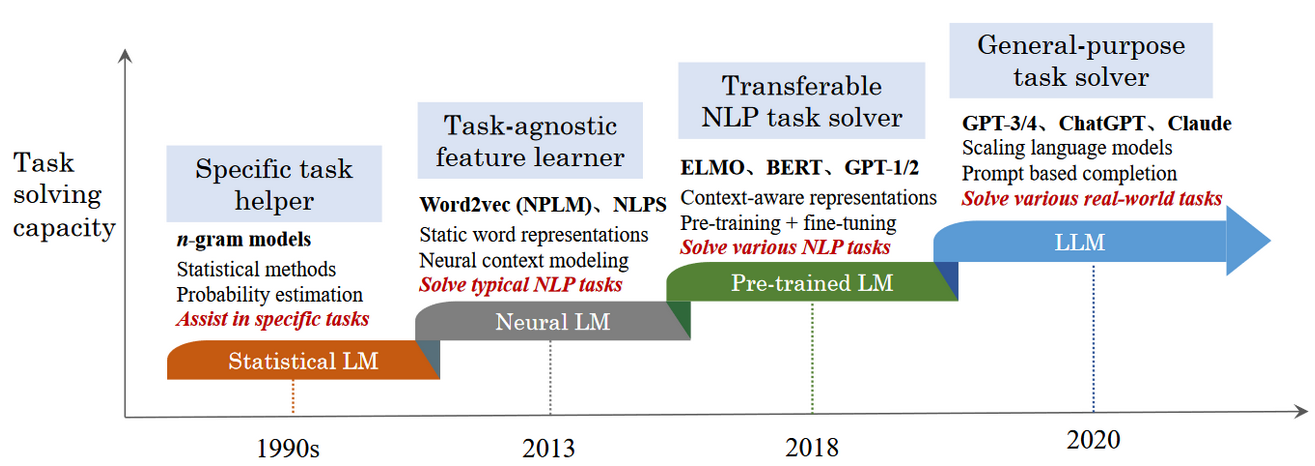

* **Tokenization**: Breaking down text into smaller units (tokens), which could be words, subwords, or characters.
* **Embedding**: Converting tokens into dense vectors that capture semantic meanings.
* **Architecture**: Utilizing neural network architectures (e.g., RNNs, LSTMs, Transformers) to process sequences of embeddings.
* **Training**: Using large corpora of text and training objectives (e.g., predicting the next word) to adjust model parameters.

**advantages:**

* **Impressive Text Generation:** LLMs excel at creating human-quality text formats,  like poems, code, scripts, musical pieces, etc. They can generate different creative text formats based on instructions and can even adapt their writing style to mimic specific authors.
* **Enhanced Machine Translation:** Compared to traditional models, LLMs deliver superior machine translation accuracy, breaking down language barriers more effectively. They can handle complex sentence structures and nuanced expressions better, leading to more natural-sounding translations.
* **Powerful Text Summarization:** LLMs can condense large amounts of text into concise and informative summaries. This is valuable for research, news analysis, and other situations where quickly grasping the essence of lengthy content is crucial.
* **Advanced Chatbots and Virtual Assistants:** LLMs power chatbots that can hold more engaging and informative conversations. They can understand complex queries, respond in a natural way, and even adapt their communication style based on the user's tone and intent. Virtual assistants powered by LLMs can handle a wider range of tasks and provide more helpful responses.
* **Improved Content Creation:** LLMs can assist with content creation by generating ideas, outlining structures, and even writing drafts. This can save time and effort for content creators while boosting creativity and productivity.
* **Code Generation and Analysis:** LLMs are showing promise in generating code based on specifications or translating natural language instructions into code.  They can also be used to analyze existing code and identify potential issues.

**limitations:**

* **Bias and Fairness:**  A major concern is bias. If trained on biased data, LLMs can perpetuate those biases in their outputs. This can lead to unfair or discriminatory outcomes and requires careful monitoring and mitigation strategies.
* **Limited Common Sense Reasoning:**  While LLMs can process information and respond in a seemingly intelligent way, they often lack true common sense reasoning. They might struggle with tasks requiring real-world understanding and the ability to apply knowledge to novel situations.
* **Sensitivity to Context:**  LLMs can be sensitive to context. Misinterpretations can occur if context is unclear or missing from the input. This necessitates careful phrasing of prompts and instructions to ensure accurate outputs.
* **Explainability:**  Understanding the reasoning behind an LLM's output can be challenging, limiting their use in critical decision-making processes.  It can be difficult to pinpoint how the LLM arrived at a specific answer, making it hard to assess its reliability.
* **Computational Cost:** Training and running LLMs requires significant computational power, making them resource-intensive. This can limit accessibility and raise environmental concerns due to the energy consumption involved.
* **Potential for Misuse:** The power of LLMs can be misused for malicious purposes like generating deepfakes or spreading misinformation.  It's crucial to develop safeguards and ethical guidelines to ensure responsible use of these technologies.

## Q5:Large Language Models (LLMs) vs Label Propagation.

**Labeling with Large Language Models (LLMs)**

**advantages**

* **Contextual Understanding**:
    - **Semantic Accuracy**: LLMs can understand context and nuances in the text, leading to more accurate and contextually appropriate labels.
    - **Complex Patterns**: Capable of capturing and labeling complex patterns that might be missed by simpler algorithms or human annotators.

* **Adaptability**:
    - **Domain-Specific Fine-Tuning**: LLMs can be fine-tuned on domain-specific data to improve labeling accuracy in specialized fields.
    - **Versatility**: Applicable to a wide range of tasks, including sentiment analysis, topic classification, named entity recognition, and more.

* **Uniform Labels**

**disadvantages**

* **Resource Intensive**:
    - **Computational Cost**
    - **Energy and time Consumption**

* **Quality of Training Data**:
    - **Bias and Fairness**
    - **Dependence on Pre-training**

* **Interpretability**:
    - **Opaque Decision-Making**: Understanding why an LLM labeled a data point a certain way can be challenging, making it harder to debug or refine the labeling process.

* **Initial Setup and Maintenance**:
    - **Complex Setup**: Setting up and fine-tuning LLMs requires expertise and can be time-consuming.
    - **Ongoing Maintenance**: Regular updates and maintenance are necessary to ensure the LLM remains effective as datasets and labeling requirements evolve.

**Label Propagation**

**advantages**

* **Efficiency**:
    - **Data Utilization**: Label propagation efficiently uses labeled and unlabeled data, reducing the need for a large amount of labeled data.
    - **Low Computational Requirements**

* **Simplicity**:
    - **Ease of Implementation**
    - **Fast Setup**

**disadvantages**

* **Accuracy and Precision**:
    - **Sensitivity to Initial Labels**: The accuracy of label propagation is heavily dependent on the quality and representativeness of the initial labeled data.
    - **Propagation of Errors**: Errors in initial labels can propagate through the dataset, leading to widespread inaccuracies.

* **Lack of Deep Understanding**: Unlike LLMs, label propagation does not inherently understand the context or semantics of the data, which can limit its effectiveness for nuanced or complex labeling tasks.

* **Memory Usage**

Experience using large language models

**GPT Chat 3.5:**
* Continuity of dialogue
* Old data
* Good texts but without content

**GPT4o chat:**
* Good writing
* Lots of data
* Title-wise presentation
* Clever
* Hard access

**Gemini:**
* Fast
* The embargo of Iran and Russia
* Provide source and image
* Title-wise presentation
* Adjustability

**Copilot:**
* Provide source
* Short speaking
* Lack of continuity in the conversation
* Inappropriate use of Internet resources
* Available
* slow
* Ability to read homework PDF